# Estrategia simple de inversión

**Estadística Aplicada**

**Cinthya Yesenia López Díaz 1658003**

**Sesión 13 - 24 marzo**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
!pip install yfinance

In [4]:
import yfinance as yf

In [5]:
ticker = 'AMZN.MX'

In [6]:
amazon = yf.download(ticker, 
                    start = '2019-01-01',
                    end = '2023-03-17',
                    progress = False)

In [7]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1451.000000,1522.499512,1451.000000,1497.750000,1497.750000,462900
2019-01-03,1507.400024,1507.400024,1472.250000,1474.000000,1474.000000,143880
2019-01-04,1500.449951,1541.362549,1496.500000,1527.000000,1527.000000,43580
2019-01-07,1550.000000,1581.000000,1539.500000,1578.361450,1578.361450,66960
2019-01-08,1612.531006,1612.531006,1570.910034,1605.208984,1605.208984,127960


In [8]:
amazon = amazon[['Adj Close']]

In [9]:
amazon = amazon.rename(columns={'Adj Close':'precio_cierre'})

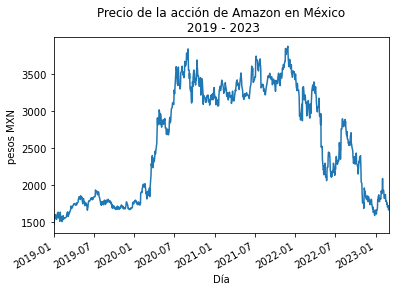

In [11]:
amazon['precio_cierre'].plot()
plt.title('Precio de la acción de Amazon en México\n 2019 - 2023')
plt.ylabel('pesos MXN')
plt.xlim('2019-01-01','2023-03-01')
plt.xlabel('Día')
plt.show()

In [12]:
## promedios moviles MA -
amazon['MA-10'] = amazon['precio_cierre'].rolling(window=10).mean()
amazon['MA-60'] = amazon['precio_cierre'].rolling(window=60).mean()

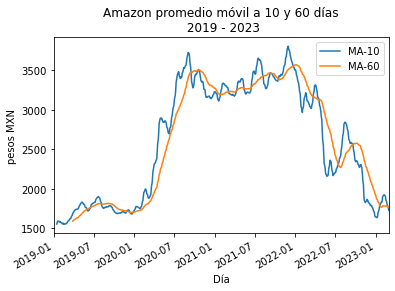

In [15]:
amazon[['MA-10', 'MA-60']].plot()
plt.title('Amazon promedio móvil a 10 y 60 días\n 2019 - 2023')
plt.ylabel('pesos MXN')
plt.xlim('2019-01-01','2023-03-01')
plt.xlabel('Día')
plt.show()

In [16]:
amazon['MA-10 > MA-60'] = amazon['MA-10'] > amazon['MA-60']

In [17]:
amazon.head()

,precio_cierre,MA-10,MA-60,MA-10 > MA-60
Date,,,,
2019-01-02,1497.750000,NaN,NaN,False
2019-01-03,1474.000000,NaN,NaN,False
2019-01-04,1527.000000,NaN,NaN,False
2019-01-07,1578.361450,NaN,NaN,False
2019-01-08,1605.208984,NaN,NaN,False


In [18]:
amazon.tail()

,precio_cierre,MA-10,MA-60,MA-10 > MA-60
Date,,,,
2023-03-10,1673.250000,1692.439001,1763.292340,False
2023-03-13,1752.089966,1695.770996,1763.516840,False
2023-03-14,1754.829956,1698.653992,1764.740171,False
2023-03-15,1826.000000,1714.455994,1767.101005,False
2023-03-16,1870.920044,1734.613000,1769.870506,False


In [19]:
# Señal
#Crear una columna adicional que indique si se debe comprar o vender la acción
amazon['Signal'] = 0
amazon.loc[amazon['MA-10 > MA-60'], 'Signal'] = 1 #comprar/mantener
amazon.loc[~amazon['MA-10 > MA-60'], 'Signal'] = -1 #vender/no comprar

## Rendimiento/Retorno de una acción 
$r_t = \frac{P_t - P_{t-1}}{P_{t-1}}$

In [21]:
amazon['return'] = amazon['precio_cierre'].pct_change()

In [22]:
amazon

,precio_cierre,MA-10,MA-60,MA-10 > MA-60,Signal,return
Date,,,,,,
2019-01-02,1497.750000,NaN,NaN,False,-1,NaN
2019-01-03,1474.000000,NaN,NaN,False,-1,-0.015857
2019-01-04,1527.000000,NaN,NaN,False,-1,0.035957
2019-01-07,1578.361450,NaN,NaN,False,-1,0.033636
2019-01-08,1605.208984,NaN,NaN,False,-1,0.017010
...,...,...,...,...,...,...
2023-03-10,1673.250000,1692.439001,1763.292340,False,-1,-0.012791
2023-03-13,1752.089966,1695.770996,1763.516840,False,-1,0.047118
2023-03-14,1754.829956,1698.653992,1764.740171,False,-1,0.001564


In [25]:
# retorno de todo el periodo
amazon['return'].cumsum()

Date
2019-01-02         NaN
2019-01-03   -0.015857
2019-01-04    0.020099
2019-01-07    0.053735
2019-01-08    0.070745
                ...   
2023-03-10    0.366753
2023-03-13    0.413870
2023-03-14    0.415434
2023-03-15    0.455991
2023-03-16    0.480591
Name: return, Length: 1061, dtype: float64

In [27]:
#rendimiento cuando solo invertimos
amazon.query('Signal == -1')['return'].cumsum()

Date
2019-01-02         NaN
2019-01-03   -0.015857
2019-01-04    0.020099
2019-01-07    0.053735
2019-01-08    0.070745
                ...   
2023-03-10   -0.111094
2023-03-13   -0.063976
2023-03-14   -0.062412
2023-03-15   -0.021856
2023-03-16    0.002744
Name: return, Length: 559, dtype: float64